# Check statistics

This file helps to find and analyze single statistics sets.

### Set up requirements, import packages

Assumes to use code from local, parent directory as in the repository folder structure.

In [1]:
%load_ext autoreload
%autoreload

import os
if not os.path.basename(os.getcwd()) == "datenguide-python":
    os.chdir("..")
    
    
from datenguidepy.query_helper import get_regions, get_statistics
from datenguidepy import Query
import pandas as pd
import matplotlib
%matplotlib inline

pd.set_option('display.max_colwidth', 150)

## Find stats in datenguide

In [2]:
# get the ID of Berlin by querying all states by name
#get_regions().query("name contains 'Frankfurt'")
regions = get_regions().query('name.str.contains("Darmstadt")', engine='python')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
print(regions)

                                   name  level parent
region_id                                            
06411       Darmstadt, Kreisfreie Stadt  nuts3    064
06432      Darmstadt-Dieburg, Landkreis  nuts3    064
06411000        Darmstadt, krsfr. Stadt    lau  06411
06432020            Roßdorf b Darmstadt    lau  06432
064         Darmstadt, Regierungsbezirk  nuts2     06


In [3]:
# find out the name of the desired statistic
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(get_statistics().query('long_description.str.contains("Wasser")', engine='python'))
    
# Search words: wohn, Umwelt, Grün, Verkehr, Auto, Abfall, heiz, energ, Strom, Wasser
# No search results for search words: Luft, Energie

                                            short_description  \
statistic                                                       
AI1101         Anteil neue Wohngebäude mit 1 oder 2 Wohnungen   
AI0101      Anteil Siedlungs- und Verkehrsfläche an Gesamtfl.   
AI0102                 Anteil Erholungsfläche an Gesamtfläche   
AI0105          Veränderung der Siedlungs- und Verkehrsfläche   
AI1908           Wasserabgabe je Einwohner und Tag (in Liter)   
AI1906     verbrauchsabhängig. Entgelt Trinkw.versorg. pro m³   
AI1907        verbrauchsunabhängig. Entgelt f.Trinkw.versorg.   
WOH016                   Wohnungen in neuen Nichtwohngebäuden   
WOHN04             Wohnungen in Wohngebäuden (ohne Wohnheime)   
WOHN01                                              Wohnungen   
WOHN02                                              Wohnungen   
WAS007                       Wasserabgabe an Letztverbraucher   
WAS004                                        Wassergewinnung   
WAS003                   

### Interesting statistics on environmental topics


| statistic code |  long_description  | availabilty  |  normalisation neeed | relevant for demo |
| -------- | -------- | -------- | -------- | -------- |
| **Waste and waste treatment**
| AI1902 | Haus- und Sperrmüll | | done | yes |
| AI1903  |                                 Getrennt erfasste Wertstoffe (je Einwohner) | | done | yes
| AI1904    |                                   Abfälle aus der Biotonne | | done | yes
| AI1905    |               Biologisch abbaubare Garten- und Parkabfälle (je Einwohner)  | | done | yes 
| AI1901    |                              Haushaltsabfälle je Einwohner |  | done | yes |
| **Water**     |
| AI1908    |       Wasserabgabe je Einwohner und Tag (in Liter)| data incomplete | done | yes |
| **Land use**  |
| AI0105    |      Veränderung der Siedlungs- und Verkehrsfläche | data incomplete | done (100 for %) | yes|
| AI0113    |                 Siedlungs- und Verkehrsfläche je Einwohner | | done (100 for %) | yes|
| AI0102    |             Anteil Erholungsfläche an Gesamtfläche   | | done (100 for %) | yes|
| AI0106    |                    Anteil Siedlungsfläche an Gesamtfläche   | | done (100 for %) | yes|
| AI0107    |                     Anteil Verkehrsfläche an Gesamtfläche   | | done (100 for %) | yes|
| AI0108    |              Anteil Landwirtschaftsfläche an Gesamtfläche   | | done (100 for %) | yes|
| AI0109    |                         Anteil Waldfläche an Gesamtfläche   | data incomplete| done (100 for %) | yes|
| AI0110    | Anteil Sport-, Freizeit-, Erholungsfläche an Gesamtfläche   | | done (100 for %) | yes|
| AI0111    |      Anteil Siedlungs- und Verkehrsfläche an Gesamtfläche | | done (100 for %) | yes
| AI_Z18    |                 Durchschnittliche Wohnfläche je Einwohner | | done (100 for %) | yes |
| **Agriculture**|
| AI0904     |                  Ökologischer Landbau (Anteil an gesamter Landwirtschaftsflaeche), oder folgende zwei | | done (100 for %) | yes |
| FLC048     |                  Landfläche (LF) in Betrieben mit ökologischem Landbau  (im Verhaeltnis zu FLC017) | only 2010, 2016 | per capita | no
| FLC017     |                        Landwirtschaftlich genutzte Fläche | only some years | per capita | no
| **Energy, traffic**     |
| AI1301     |                            Pkw je 1.000 Einwohner | | done | yes |
| [not in datenguidpy] |        31121-06-01-4 Fertigstellungen neuer Wohngebäude und Nichtwohngebäude  sowie Wohnungen in Wohngebäuden nach Zahl der Wohnungen und primär verwendeter Heizenergie - Jahressumme 
| **Populatino, labour** |
| AI0701 | Arbeitsplatzdichte (Arbeitsplätze pro 1000 Einwohner) | until 2017 | done | yes 
| BEVZ15 | Bevölkerung (ab 15 Jahren) | only 2011 | per capita (100 for %)| no
| BEV083 | Zuzüge aus dem  Ausland über die Gemeindegrenzen | | per capita (factor 1000) | yes
| BEV084 | Fortzüge ins Ausland über Gemeindegrenzen | | per capita (factor 1000) | yes
| BEV085 | Zuzüge über die Kreisgrenzen | | per capita (factor 1000) | yes
| BEV086 | Fortzüge über die Kreisgrenzen | | per capita (factor 1000) | yes

In [4]:
# statistic code |  long_description    | available   |  normalisation | relevant for demo

# Category Umwelt
# Abfall... total normalised to population
# AI1902                                            Haus- und Sperrmüll   
# AI1903                                   Getrennt erfasste Wertstoffe   
# AI1904                                       Abfälle aus der Biotonne   
# AI1905                   Biologisch abbaubare Garten- und Parkabfälle 
# AI1901                                  Haushaltsabfälle je Einwohner   

# Water
# AI1908           Wasserabgabe je Einwohner und Tag (in Liter)   

# Land use
# AI0105          Veränderung der Siedlungs- und Verkehrsfläche 
# AI0113                     Siedlungs- und Verkehrsfläche je Einwohner
# AI0102                 Anteil Erholungsfläche an Gesamtfläche   
# AI0106                        Anteil Siedlungsfläche an Gesamtfläche   
# AI0107                         Anteil Verkehrsfläche an Gesamtfläche   
# AI0108                  Anteil Landwirtschaftsfläche an Gesamtfläche   
# AI0109                             Anteil Waldfläche an Gesamtfläche   
# AI0110     Anteil Sport-, Freizeit-, Erholungsfläche an Gesamtfläche   
# AI0111          Anteil Siedlungs- und Verkehrsfläche an Gesamtfläche   
# AI0113                    Siedlungs- und Verkehrsfläche je Einwohner   
# AI_Z18                     Durchschnittliche Wohnfläche je Einwohner   

# Agriculture
# AI0904                       Ökologischer Landbau (Anteil an gesamter Landwirtschaftsflaeche), oder folgende zwei
# FLC048                       LF in Betrieben mit ökologischem Landbau  (im Verhaeltnis zu FLC017)
# FLC017                             Landwirtschaftlich genutzte Fläche

# AI1301                                 Pkw je 1.000 Einwohner   

# [not in datenguidpy]         31121-06-01-4 Fertigstellungen neuer Wohngebäude und Nichtwohngebäude
# sowie Wohnungen in Wohngebäuden nach Zahl der Wohnungen und
# primär verwendeter Heizenergie - Jahressumme 


# Interesting statistics on population:

# AI0212 Wanderungssaldo
# EKM014            verfüg. Einkommen der priv. Haushalte je Einwohner   
# AI_Z12                              Durchschnittliche Haushaltsgröße   
# AI_Z13                                   Anteil Einpersonenhaushalte
# AI_Z17                                               Leerstandsquote   
# AI_Z18                     Durchschnittliche Wohnfläche je Einwohner   
# AI_Z19                       Durchschnittliche Wohnfläche je Wohnung
# AI0701                                            Arbeitsplatzdichte   
# BEVZ20                                                   Bevölkerung   
# BEVZ15                                    Bevölkerung (ab 15 Jahren)   
# BEVZ21                            Bevölkerung in privaten Haushalten   
# PHHZ20                                             Private Haushalte   
# BEVSTD                                             Bevölkerungsstand   
# BEV083              Zuzüge aus dem  Ausland über die Gemeindegrenzen   
# BEV084                     Fortzüge ins Ausland über Gemeindegrenzen   
# BEV085                                  Zuzüge über die Kreisgrenzen   
# BEV086                                Fortzüge über die Kreisgrenzen 

## Analyze a single stats set

In [5]:
years = range(2005, 2016)
#years = [2005, 2006, 2007]
years[-2:]

range(2014, 2016)

In [70]:
stat = 'AI0113'
get_statistics().query('statistic.str.contains("{}")'.format(stat), engine = 'python')

,short_description,long_description
statistic,,
AI0113,Siedlungs- und Verkehrsfläche je Einwohner,wiki\n==Siedlungs- und Verkehrsfläche je Einwohner am 31.12. in\nm² nach ALKIS (ab 2016)==\n===Aussage===\nDer Indikator gibt Aufschluss über das ...


In [71]:
q = Query.region(['06412', '06411'])

#f1 = q.add_field('AI1302')
#f2 = q.add_field('AI1304')

f1 = q.add_field(stat) 
#f2 = q.add_field('BEV084')

In [72]:
f1.get_info()

kind:
OBJECT

description:
Siedlungs- und Verkehrsfläche je Einwohner

arguments:
year: LIST of type SCALAR(Int)

statistics: LIST of type ENUM(AI0113Statistics)
enum values:
R99910: Regionalatlas Deutschland

fields:
id: Interne eindeutige ID
year: Jahr des Stichtages
value: Wert
source: Quellenverweis zur GENESIS Regionaldatenbank

enum values:
None


In [73]:
#f2.get_info()

### Plot results

In [74]:
results = q.results()
results
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(results)

,id,name,year,AI0113,AI0113_source_title_de,AI0113_source_valid_from,AI0113_source_periodicity,AI0113_source_name,AI0113_source_url
0,06412,"Frankfurt am Main, Kreisfreie Stadt",2016,196.9,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
1,06412,"Frankfurt am Main, Kreisfreie Stadt",2016,196.9,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
2,06412,"Frankfurt am Main, Kreisfreie Stadt",2017,194.4,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
3,06412,"Frankfurt am Main, Kreisfreie Stadt",2017,194.4,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
4,06412,"Frankfurt am Main, Kreisfreie Stadt",2018,192.8,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
0,06411,"Darmstadt, Kreisfreie Stadt",2016,271.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
1,06411,"Darmstadt, Kreisfreie Stadt",2016,271.6,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
2,06411,"Darmstadt, Kreisfreie Stadt",2017,270.5,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
3,06411,"Darmstadt, Kreisfreie Stadt",2017,270.5,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None
4,06411,"Darmstadt, Kreisfreie Stadt",2018,268.7,Regionalatlas Deutschland,1995-01-01T00:00:00,JAEHRLICH,99910,None


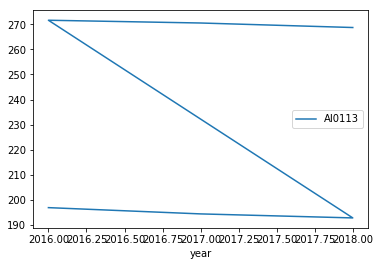

In [75]:
#results.set_index('year')[['BEV083', 'BEV084']].plot()
results.set_index('year')[[stat]].plot()

### Same but interactive plot with plotly

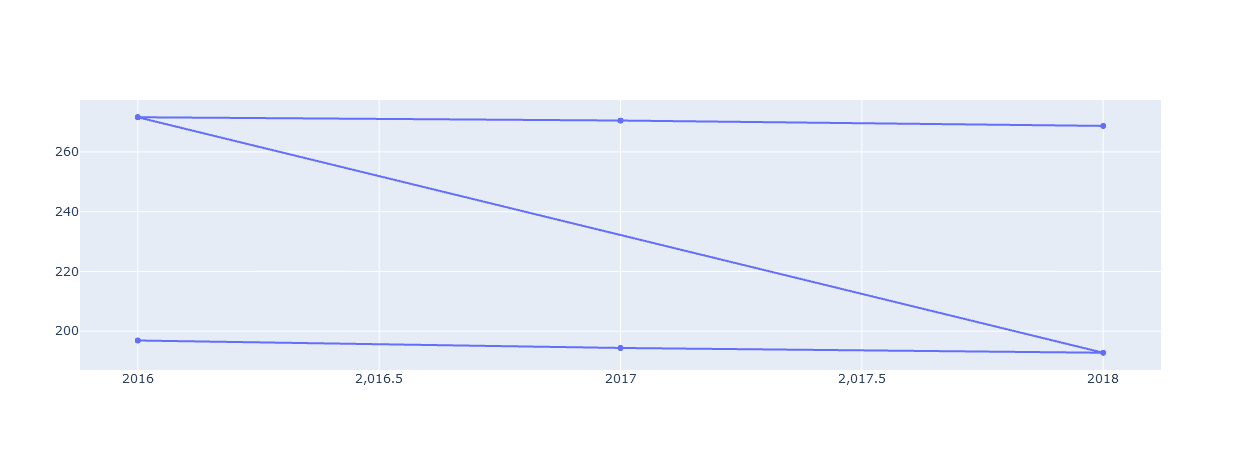

In [76]:
import plotly.graph_objs as go

df = results.set_index('year')

fig = go.Figure()
fig.add_trace(
    go.Scattergl(
        x=df.index,
        y=df[stat],
        mode="lines+markers"
        #name="AI1302",
    )
)

#fig.add_trace(
#    go.Scattergl(
#        x=df.index,
#        y=df['AI1304'],
#        mode="lines+markers",
#        name="AI1304",
#    )
#)

#fig.update_xaxes(title_text="Time")
#fig.update_yaxes(title_text="Accidents")

fig.show()